In [1]:
from google.colab import drive

In [ ]:
!pip freeze > requirements.txt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
file_path = '/content/drive/My Drive/Colab Notebooks/training_loan_data.csv'

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(file_path,  header=1) ###the first row not the header

In [4]:
print(data.columns)

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'emp_length',
       'home_ownership', 'annual_inc', 'desc', 'purpose', 'percent_bc_gt_75',
       'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq',
       'revol_util', 'total_bc_limit', 'mths_since_last_major_derog',
       'tot_hi_cred_lim', 'tot_cur_bal', 'application_approved_flag',
       'internal_score', 'bad_flag'],
      dtype='object')


In [5]:
data.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


In [6]:
num_records = data.shape[0]
print(f"Number of records: {num_records}")

Number of records: 199121


In [7]:
num_fields = data.shape[1]
print(f"Number of fields: {num_fields}")

Number of fields: 23


In [8]:
print(data.dtypes)

id                               int64
member_id                      float64
loan_amnt                        int64
term                            object
int_rate                        object
emp_length                      object
home_ownership                  object
annual_inc                     float64
desc                            object
purpose                         object
percent_bc_gt_75               float64
bc_util                        float64
dti                            float64
inq_last_6mths                 float64
mths_since_recent_inq          float64
revol_util                      object
total_bc_limit                 float64
mths_since_last_major_derog    float64
tot_hi_cred_lim                float64
tot_cur_bal                    float64
application_approved_flag        int64
internal_score                   int64
bad_flag                       float64
dtype: object


In [9]:
data.replace('', np.nan, inplace=True) ##replace missing with NaN then check how many missing values in each column

In [10]:
null_counts = data.isnull().sum()
print("Count of null values for each field:")
print(null_counts)

Count of null values for each field:
id                                  0
member_id                        9664
loan_amnt                           0
term                             9664
int_rate                         9664
emp_length                      17590
home_ownership                   9664
annual_inc                       9664
desc                           117117
purpose                          9664
percent_bc_gt_75                18702
bc_util                         18788
dti                              9664
inq_last_6mths                   9664
mths_since_recent_inq           37649
revol_util                       9791
total_bc_limit                  17159
mths_since_last_major_derog    166372
tot_hi_cred_lim                 17159
tot_cur_bal                     37405
application_approved_flag           0
internal_score                      0
bad_flag                         9664
dtype: int64


Handling Missing values

In [11]:
miscol = ['desc', 'member_id', 'mths_since_last_major_derog']  ##drop columns with most empty
data.drop(miscol, axis=1, inplace=True)


In [12]:
data = data.dropna(subset=['bad_flag'])  ##if target columns has missing values, just remove the rows

In [13]:
null_counts = data.isnull().sum()
print("Count of null values for each field:")
print(null_counts)

Count of null values for each field:
id                               0
loan_amnt                        0
term                             0
int_rate                         0
emp_length                    7926
home_ownership                   0
annual_inc                       0
purpose                          0
percent_bc_gt_75              9038
bc_util                       9124
dti                              0
inq_last_6mths                   0
mths_since_recent_inq        27985
revol_util                     127
total_bc_limit                7495
tot_hi_cred_lim               7495
tot_cur_bal                  27741
application_approved_flag        0
internal_score                   0
bad_flag                         0
dtype: int64


In [14]:
data['term'] = data['term'].str.extract('(\d+)').astype(float) ##transform term column to numerical column and remove units

In [15]:
# Map '10+ years' to 10, '< 1 year' to 0, and extract numeric years from the rest
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)
data['emp_length'] = data['emp_length'].fillna(0)  # Assume missing values as 0 (less than a year)


In [16]:
percentage_columns = ['int_rate', 'revol_util']
for col in percentage_columns:
    if col in data.columns and data[col].dtype == 'object':
        data[col] = data[col].str.replace('%', '').astype(float) / 100

In [17]:
columns_to_impute = [
     'revol_util',  'percent_bc_gt_75',
    'bc_util',  'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal'
]

# Replace missing values with the median for each column
for col in columns_to_impute:
    data[col] = data[col].fillna(data[col].median())


In [18]:
data['mths_since_recent_inq'] = data['mths_since_recent_inq'].fillna(0)

In [19]:
data["id"] = data["id"].astype("str")


The dataset has been cleaned

In [20]:
null_counts = data.isnull().sum()
print("Count of null values for each field:")
print(null_counts)

Count of null values for each field:
id                           0
loan_amnt                    0
term                         0
int_rate                     0
emp_length                   0
home_ownership               0
annual_inc                   0
purpose                      0
percent_bc_gt_75             0
bc_util                      0
dti                          0
inq_last_6mths               0
mths_since_recent_inq        0
revol_util                   0
total_bc_limit               0
tot_hi_cred_lim              0
tot_cur_bal                  0
application_approved_flag    0
internal_score               0
bad_flag                     0
dtype: int64


In [21]:
print(data.dtypes)

id                            object
loan_amnt                      int64
term                         float64
int_rate                     float64
emp_length                   float64
home_ownership                object
annual_inc                   float64
purpose                       object
percent_bc_gt_75             float64
bc_util                      float64
dti                          float64
inq_last_6mths               float64
mths_since_recent_inq        float64
revol_util                   float64
total_bc_limit               float64
tot_hi_cred_lim              float64
tot_cur_bal                  float64
application_approved_flag      int64
internal_score                 int64
bad_flag                     float64
dtype: object


EAD

In [24]:
display(data.describe())## neumerical colunns stats

,loan_amnt,term,int_rate,emp_length,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
count,189457.000000,189457.000000,189457.000000,189457.000000,1.894570e+05,189457.000000,189457.000000,189457.000000,189457.000000,189457.000000,189457.000000,189457.000000,189457.000000,1.894570e+05,189457.0,189457.000000,189457.000000
mean,14353.641987,41.657051,0.142827,5.907546,7.224330e+04,53.405224,67.098955,17.061084,0.803549,5.960593,0.583917,20020.282687,20016.810116,1.290396e+05,1.0,187.629520,0.069293
std,8112.121438,10.186636,0.044381,3.593983,5.180483e+04,33.338047,25.500808,7.596941,1.032936,5.968414,0.229995,18534.058373,18595.217308,1.406918e+05,0.0,105.444113,0.253952
min,1000.000000,36.000000,0.060000,0.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,14.000000,0.000000
25%,8000.000000,36.000000,0.111400,2.000000,4.500000e+04,28.600000,50.900000,11.340000,0.000000,1.000000,0.425000,8100.000000,8073.189819,3.199800e+04,1.0,105.000000,0.000000
50%,12175.000000,36.000000,0.140900,6.000000,6.200000e+04,50.000000,72.200000,16.780000,0.000000,4.000000,0.605000,14700.000000,14637.479485,8.076050e+04,1.0,159.000000,0.000000
75%,20000.000000,36.000000,0.172700,10.000000,8.700000e+04,80.000000,88.300000,22.580000,1.000000,9.000000,0.766000,25700.000000,25703.471630,1.855840e+05,1.0,261.000000,0.000000
max,35000.000000,60.000000,0.260600,10.000000,7.141778e+06,100.000000,339.600000,34.990000,8.000000,24.000000,1.404000,522210.000000,520643.298200,8.000078e+06,1.0,456.000000,1.000000


In [25]:
data.describe(include=['object']) ##categorical columns stas

,id,home_ownership,purpose
count,189457,189457,189457
unique,188123,5,13
top,10049428,MORTGAGE,debt_consolidation
freq,2,97647,112259


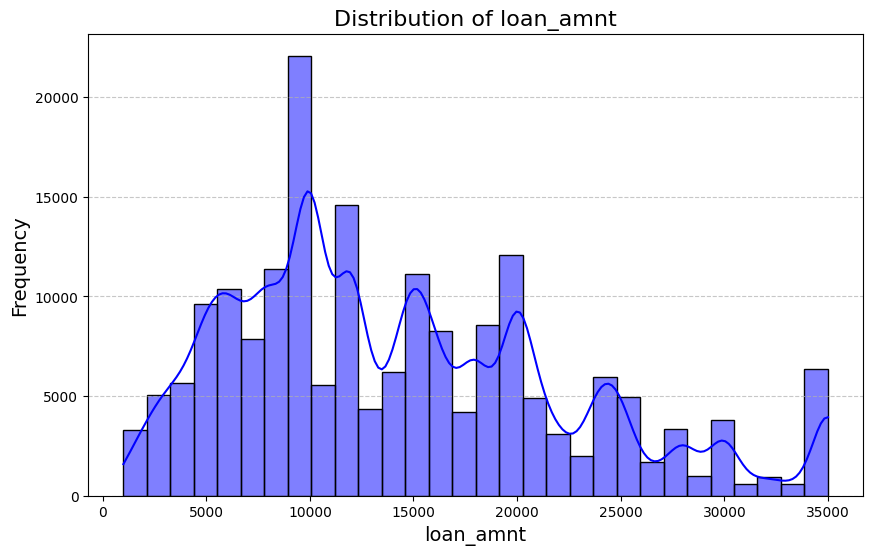

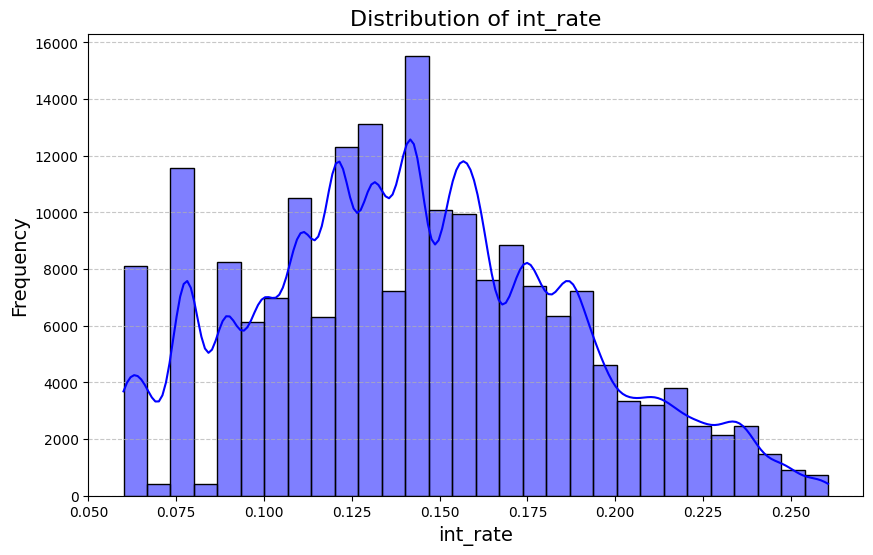

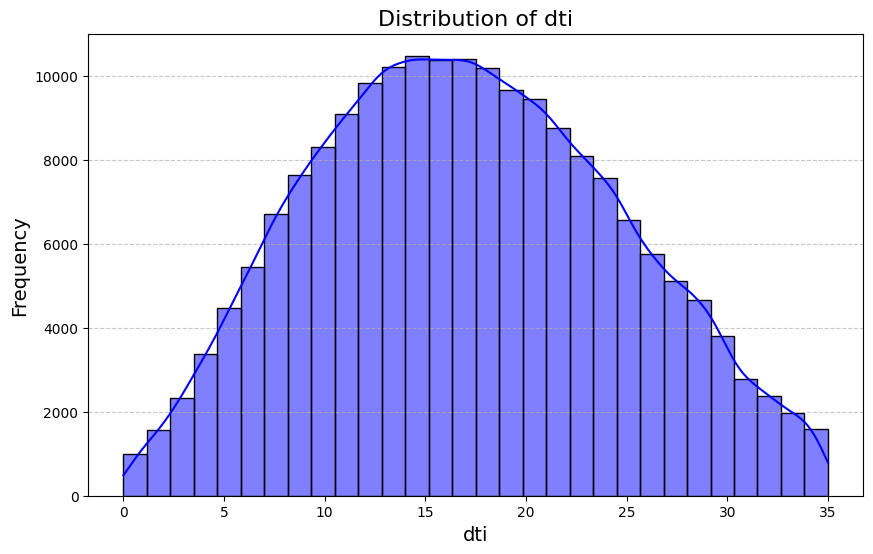

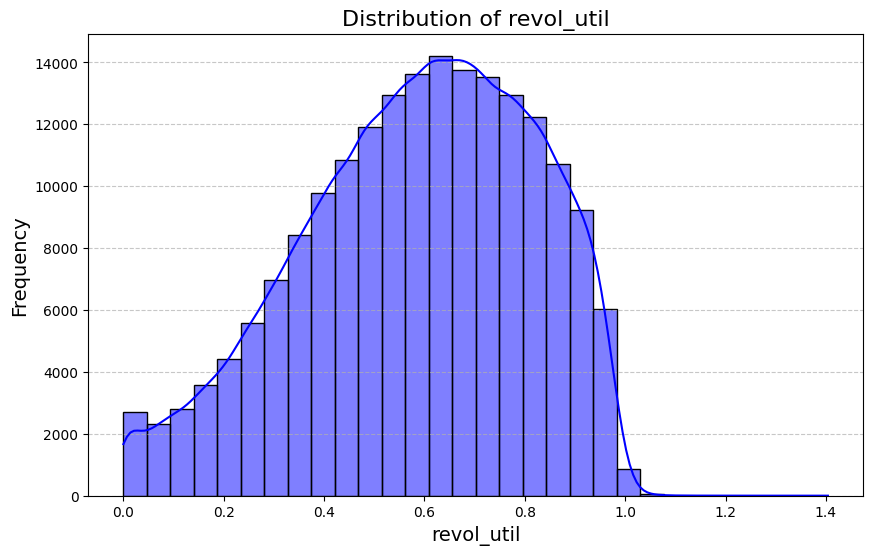

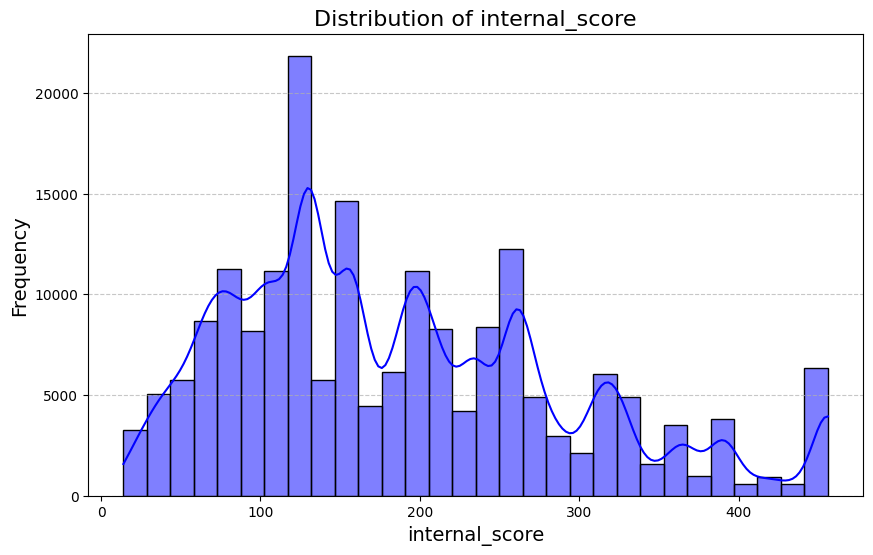

In [26]:
columns_to_visualize = ['loan_amnt', 'int_rate', 'dti', 'revol_util', 'internal_score']
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


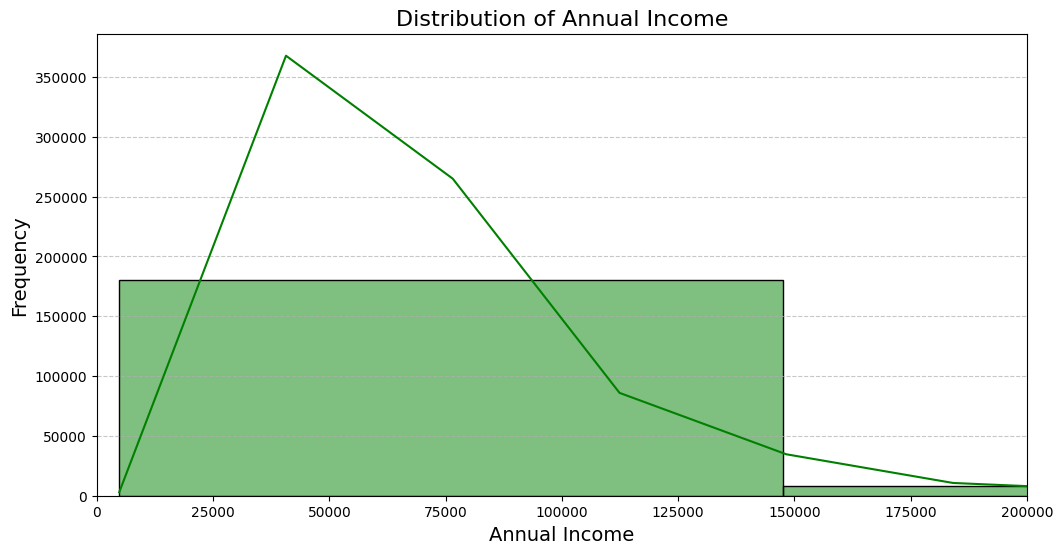

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='annual_inc', kde=True, bins=50, color='green', log_scale=(False, False))
plt.title('Distribution of Annual Income', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 200000)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

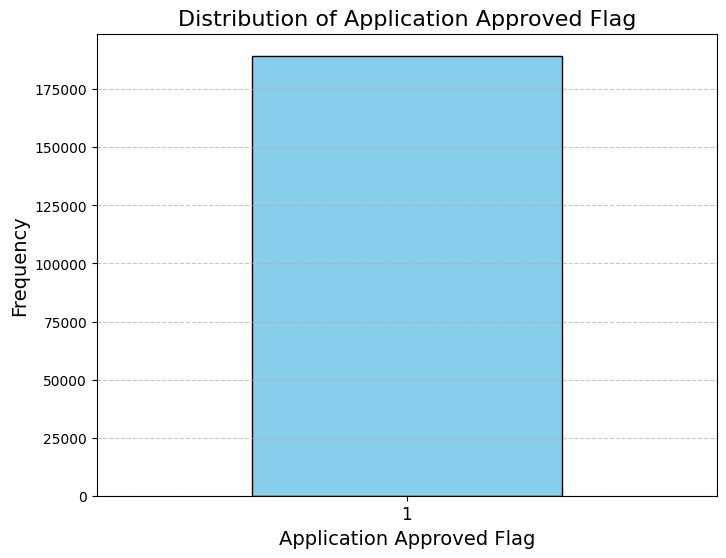

In [28]:

plt.figure(figsize=(8, 6))
data['application_approved_flag'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Application Approved Flag', fontsize=16)
plt.xlabel('Application Approved Flag', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### the application approved flag column, all values are 1, no information provided and this column may cause data leakage, so remove the column

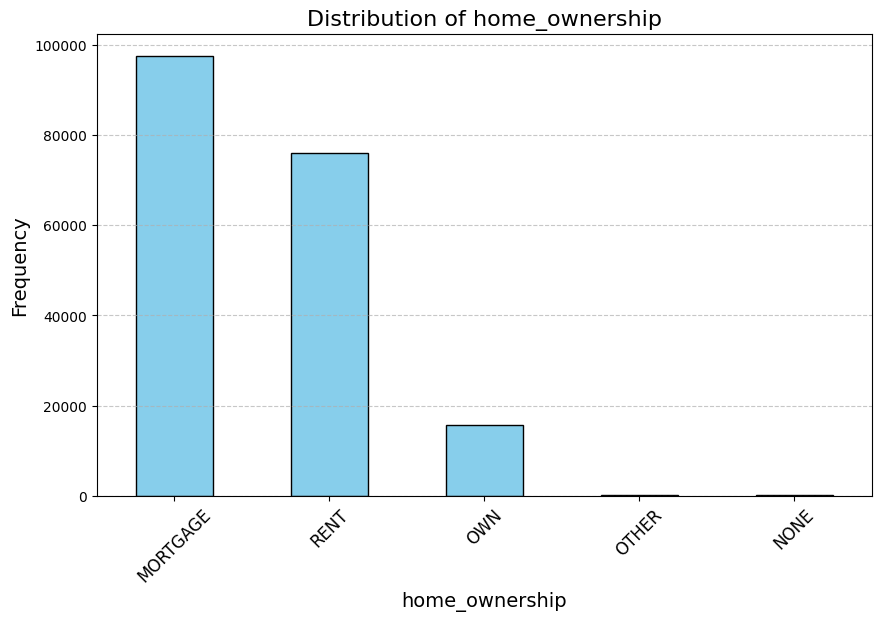

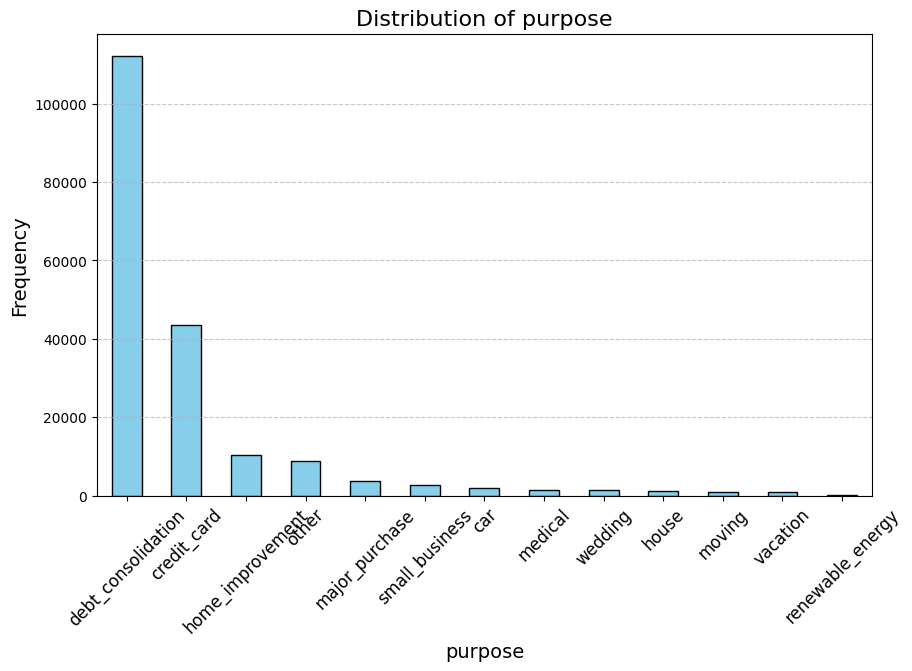

In [29]:
# Identify object-type columns
object_columns = ['home_ownership', 'purpose']

# Visualize each object-type column
for col in object_columns:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

combine 'other' and 'None' to 'other' in home_ownership

In [22]:
data['home_ownership'] = data['home_ownership'].replace(['OTHER', 'NONE'], 'OTHER')

One-hot Encoded for categorical columns

In [23]:
categorical_columns = ['purpose', 'home_ownership']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=False, dtype=int)

# Confirm the transformation
data_encoded.head(), data_encoded.columns

(         id  loan_amnt  term  int_rate  emp_length  annual_inc  \
 0  10000001       7550  36.0    0.1624         3.0     28000.0   
 1  10000002      27050  36.0    0.1099        10.0     55000.0   
 2  10000003      12000  36.0    0.1099         4.0     60000.0   
 3  10000004      28000  36.0    0.0762         5.0    325000.0   
 4  10000005      12000  36.0    0.1353        10.0     40000.0   
 
    percent_bc_gt_75  bc_util    dti  inq_last_6mths  ...  purpose_moving  \
 0             100.0     96.0   8.40             0.0  ...               0   
 1              25.0     53.9  22.87             0.0  ...               0   
 2               0.0     15.9   4.62             1.0  ...               0   
 3              16.7     67.1  18.55             1.0  ...               0   
 4              33.3     79.6  16.94             0.0  ...               0   
 
    purpose_other  purpose_renewable_energy  purpose_small_business  \
 0              0                         0                  

### take a look the correlation between numerical columns


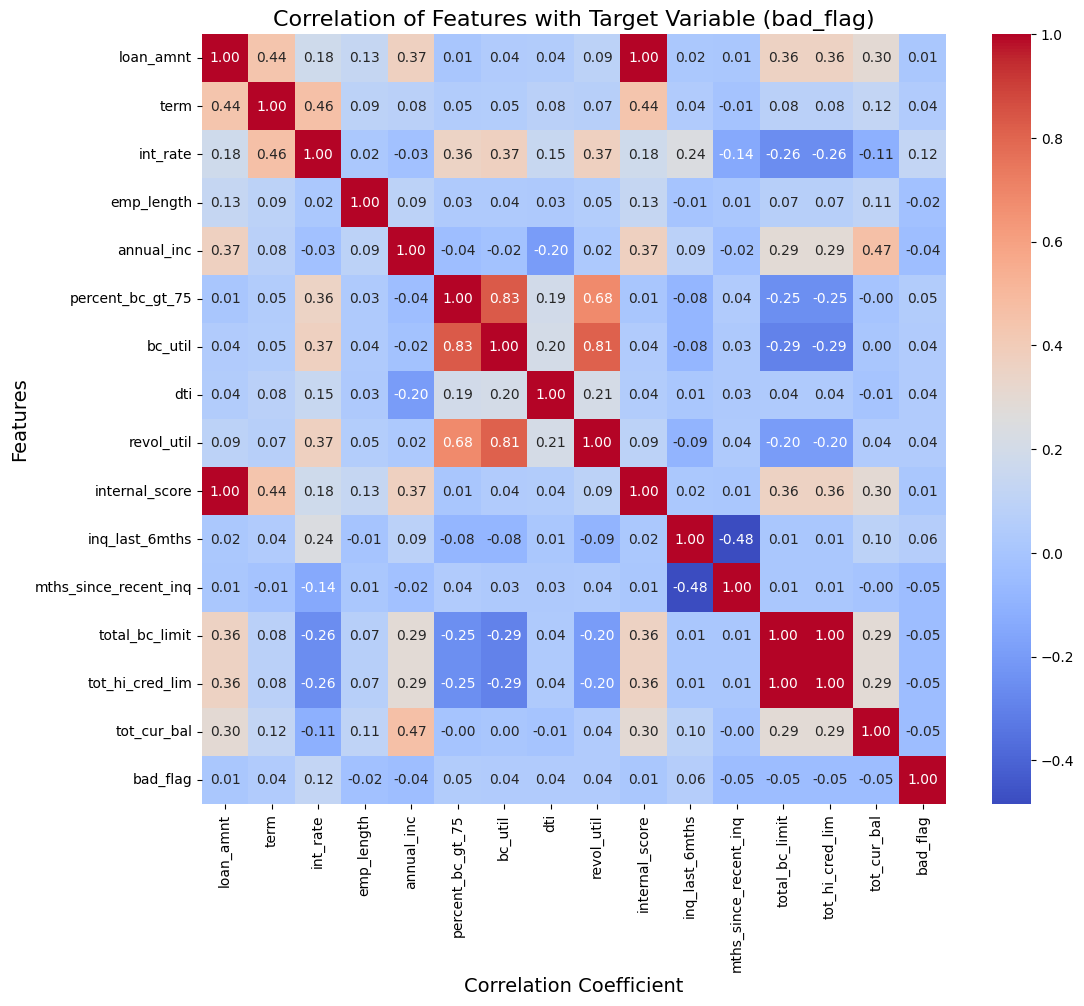

In [32]:
numerical_columns = ['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'percent_bc_gt_75', 'bc_util', 'dti', 'revol_util', 'internal_score',
                     'inq_last_6mths', 'mths_since_recent_inq', 'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal',  'bad_flag']

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True, fmt=".2f", cmap='coolwarm', cbar=True
)
plt.title('Correlation of Features with Target Variable (bad_flag)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

### drop all the high correlation columns, which is redundant

In [24]:
miscol = ['id', 'application_approved_flag', 'tot_hi_cred_lim', 'revol_util', 'loan_amnt', 'bc_util']  ##drop useless columns
data_encoded.drop(miscol, axis=1, inplace=True)

In [25]:
data_encoded.head()

,term,int_rate,emp_length,annual_inc,percent_bc_gt_75,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,tot_cur_bal,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,36.0,0.1624,3.0,28000.0,100.0,8.40,0.0,17.0,4000.0,5759.0,...,0,0,0,0,0,0,0,0,0,1
1,36.0,0.1099,10.0,55000.0,25.0,22.87,0.0,8.0,35700.0,114834.0,...,0,0,0,0,0,0,0,0,1,0
2,36.0,0.1099,4.0,60000.0,0.0,4.62,1.0,3.0,18100.0,7137.0,...,0,0,0,0,0,0,0,0,0,1
3,36.0,0.0762,5.0,325000.0,16.7,18.55,1.0,3.0,42200.0,799592.0,...,0,0,0,0,0,0,1,0,0,0
4,36.0,0.1353,10.0,40000.0,33.3,16.94,0.0,17.0,7000.0,13605.0,...,0,0,0,0,0,0,0,0,0,1


### Insights:
Loan Amount (loan_amnt): Most loans are clustered around  10000– 20000.

Interest Rate (int_rate): Rates range from 6% to 26%, with a peak around 14%.

Annual Income (annual_inc): Majority of applicants earn less than $100000 annually.

Debt-to-Income Ratio (dti): Most applicants have a DTI below 40%.

Revolving Utilization (revol_util): Peaks around 60%, indicating moderate credit utilization.

Internal Score (internal_score): Scores cluster around 150–250.

loan_amt and internal_score has high correlation, tot_hi_cred_lim and total_bc_limit also has high correlation, remove either one to reduce overfitting

### before Model Building, remove outliers for all columns



In [26]:
def remove_outliers_iqr(df, columns, factor=1.5):
    df_cleaned = df.copy()

    for column in columns:
        if column in df_cleaned.columns:
            Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile
            Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile
            IQR = Q3 - Q1

            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR

            # Filter rows within the IQR bounds
            df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)

        else:
            print(f"Warning: Column '{column}' not found in DataFrame.")

    return df_cleaned

In [27]:
# Columns to clean
columns_to_check = [ 'term', 'int_rate', 'emp_length', 'annual_inc', 'percent_bc_gt_75',
        'dti', 'inq_last_6mths', 'mths_since_recent_inq',
       'total_bc_limit', 'tot_cur_bal', 'internal_score']


# Remove outliers
cleaned_data = remove_outliers_iqr(data_encoded, columns_to_check)

print(cleaned_data)

        term  int_rate  emp_length  annual_inc  percent_bc_gt_75    dti  \
0       36.0    0.1624         3.0     28000.0             100.0   8.40   
1       36.0    0.1099        10.0     55000.0              25.0  22.87   
2       36.0    0.1099         4.0     60000.0               0.0   4.62   
3       36.0    0.0762         5.0    150000.0              16.7  18.55   
4       36.0    0.1353        10.0     40000.0              33.3  16.94   
...      ...       ...         ...         ...               ...    ...   
199116  36.0    0.1588         8.0    115000.0             100.0  16.99   
199117  36.0    0.1433        10.0     54000.0              25.0  13.96   
199118  36.0    0.1678         1.0     67500.0             100.0  14.58   
199119  36.0    0.1952         8.0     37655.0               0.0  13.77   
199120  36.0    0.1064        10.0    130000.0               0.0   1.38   

        inq_last_6mths  mths_since_recent_inq  total_bc_limit  tot_cur_bal  \
0                  0.

## Look at the target variable distribution

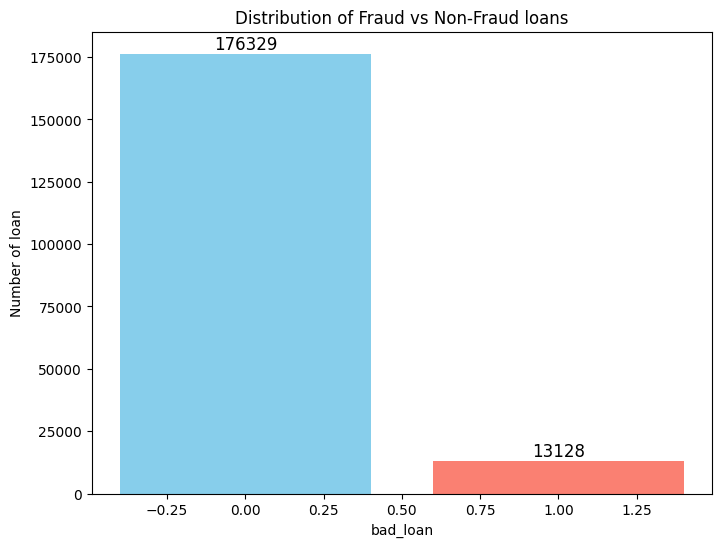

In [28]:
fraud_counts = data['bad_flag'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(fraud_counts.index, fraud_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 100, str(yval), ha='center', va='bottom', fontsize=12)

plt.xlabel('bad_loan')
plt.ylabel('Number of loan')
plt.title('Distribution of Fraud vs Non-Fraud loans')

plt.show()

In [29]:
data_encoded.to_csv("/content/drive/My Drive/Colab Notebooks/cleaned_training_data.csv", index=False)